Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta1, beta2, beta3, epsilon]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    7.852  0.152   7.567    8.141      0.002    0.001    5904.0   
beta1    0.855  0.075   0.717    0.993      0.001    0.001    4846.0   
beta2    0.062  0.018   0.030    0.098      0.000    0.000    5155.0   
beta3   -0.008  0.009  -0.025    0.008      0.000    0.000    4513.0   
epsilon  1.536  0.112   1.317    1.743      0.002    0.001    4982.0   

         ess_tail  r_hat  
alpha      3491.0    1.0  
beta1      3107.0    1.0  
beta2      3228.0    1.0  
beta3      3212.0    1.0  
epsilon    2411.0    1.0  


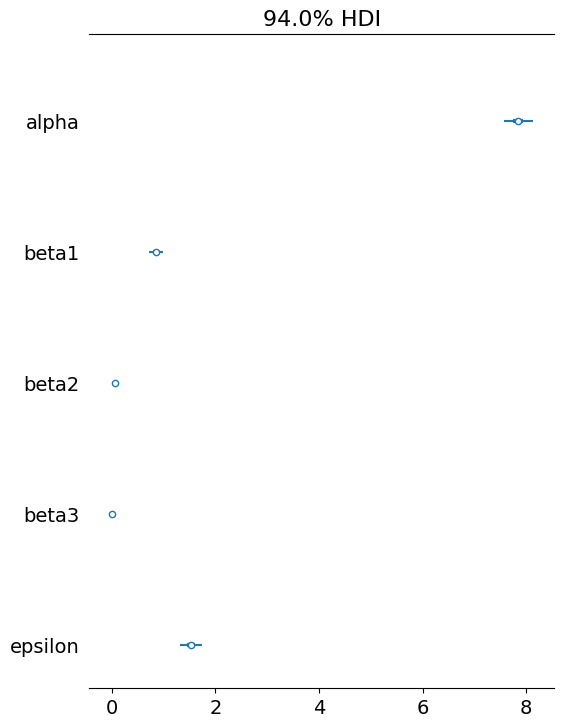

In [2]:
import pandas as pd
import numpy as np
import pymc as pm

df = pd.read_csv('date_regresie.csv')

x1 = df['Salariu'].values
x2 = df['Ore_lucrate'].values
y = df['Satisfactie'].values

x1_centered = x1 - x1.mean()
x2_centered = x2 - x2.mean()

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)
    epsilon = pm.Normal('epsilon', mu=0, sigma=100)
    
    mu = alpha + beta1 * x1_centered + beta2 * x2_centered + beta3 * x1_centered * x2_centered
    
    # Likelihood
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y)
    
    # Sample from the posterior
    idata = pm.sample(2000, return_inferencedata=True)

pm.plot_forest(idata, combined=True)

# Print the summary of the model
print(pm.summary(idata))

Beta1 are media de 0,855, asta inseamna ca salariul are o influenta puternic pozitiva asupra satisfactiei angajatilor
Beta2 are media de 0,062, asta inseamna ca numarul de ore lucrate influenteaza pozitiva asupra satisfactiei clientilor, insa nu la fel de mare ca salariul.
Beta3 are media -0.008, asta inseamna ca nu exista o corelatie puternica intre salariu si numarul de ore lucrate.